In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
#import datapane as dp

from tabulate import tabulate

In [28]:
msft = yf.Ticker("ABNB")
df =  msft.history(period="MAX", interval="1d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-10 00:00:00-05:00,146.000000,165.000000,141.250000,144.710007,70447500,0.0,0.0
2020-12-11 00:00:00-05:00,146.550003,151.500000,135.100006,139.250000,26980800,0.0,0.0
2020-12-14 00:00:00-05:00,135.000000,135.300003,125.160004,130.000000,16966100,0.0,0.0
2020-12-15 00:00:00-05:00,126.690002,127.599998,121.500000,124.800003,10914400,0.0,0.0
2020-12-16 00:00:00-05:00,125.830002,142.000000,124.910004,137.990005,20409600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-10 00:00:00-04:00,127.690002,132.779999,126.949997,131.589996,5114700,0.0,0.0
2023-10-11 00:00:00-04:00,132.119995,132.690002,128.520004,130.000000,3456500,0.0,0.0
2023-10-12 00:00:00-04:00,130.289993,130.410004,124.820000,125.970001,4023300,0.0,0.0


Alparecer solo trae los datos desde 10 de dicembre del 2020

# Analisis Exploratorio De Los Datos
## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
df.dtypes


Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [ ]:
(
    df
    .dtypes
    .value_counts()
)

float64    6
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
df.shape

(716, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [ ]:
(   df
    .isnull()
    .any()
    )

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

## Preludio: ¿Qué estadísticos describen el conjunto de datos?
### Todas las variables

In [29]:
df.describe(include='all')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,716.000000,716.000000,716.000000,716.000000,7.160000e+02,716.0,716.0
mean,139.985272,143.163364,136.872536,140.060678,6.641191e+06,0.0,0.0
std,29.797721,30.725800,28.810198,29.679723,5.481793e+06,0.0,0.0
min,82.970001,84.250000,81.910004,82.489998,1.995400e+06,0.0,0.0
25%,115.674000,118.862501,113.445002,116.127499,4.124100e+06,0.0,0.0
50%,140.195000,143.165001,137.014999,139.510002,5.297500e+06,0.0,0.0
75%,164.142502,168.367249,160.635002,164.805004,7.248175e+06,0.0,0.0
max,216.240005,219.940002,209.089996,216.839996,7.478640e+07,0.0,0.0


Alparecer la columnas Dividend  y Stock Splits es 0, esto puede deberse a que desde hace 716 dias no ha habido reparticion de dividendos ni han hecho Splits a las acciones, para que la gente compre mas.

## Confirmamos que toda la  columna tiene valor 0.0

In [17]:
contador_ceros = df['Stock Splits'].value_counts().get(0, 0)
print(contador_ceros)


716


In [31]:
# Seleccionar registros que no contengan 0.0 en 'mi_columna'
registros_sin_cero = df.loc[df['Stock Splits'] != 0.0]

registros_sin_cero

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [30]:

# Seleccionar registros que no contengan 0.0 en 'mi_columna'
registros_sin_cero = df.loc[df['Dividends'] != 0.0]

registros_sin_cero

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


Como ninguna de estas 2 columnas nos sirven para anailisis seran borradas posteriormente


## Corplot Para Analizar las Correlaciones entre Las variables


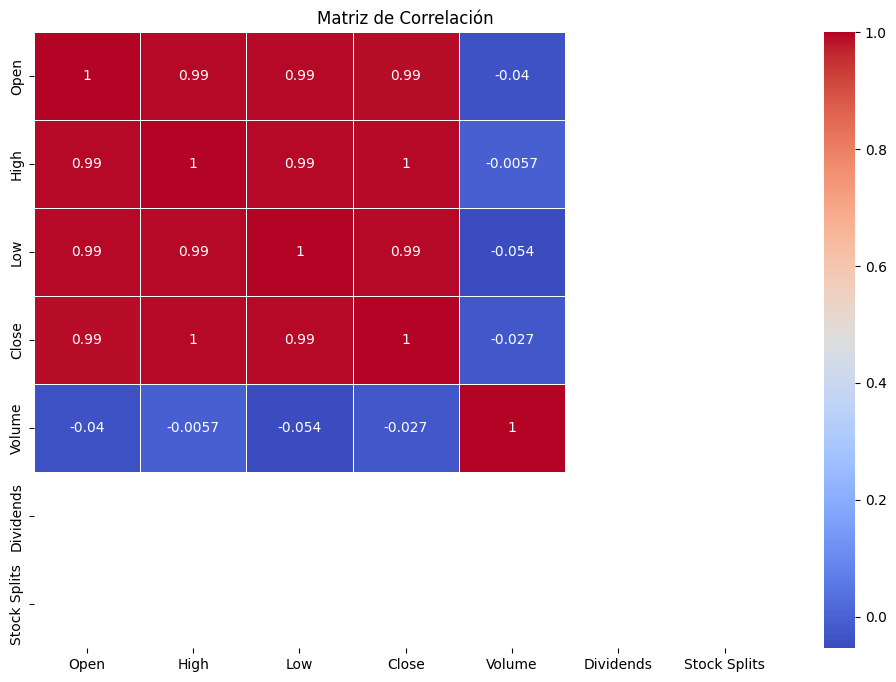

In [ ]:
correlation_matrix = df.corr()

# Crea el gráfico de matriz de correlación (corrplot)
plt.figure(figsize=( 12,8))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que la unica todos las variables tienen correlacion entre si, exceptuando Volume

## Graficando el precio de cierre de Airbnb en Los Ultimos 720 dias 

In [ ]:
airbnb_price_chart = px.line(df['Close'],
                             title='Airbnb Daily Close Price',
                             color_discrete_map={'Close':'green'},
                             width=800, height=800)
airbnb_price_chart.show()

Podemos observar una caida pronunciada en las acciones de airbnb, desde el 4 de abril , hasta  el 14 de julio.
al dia de hoy en los ultimos meses , podemos ver de que el mercado se ha recuperado, rompiendo la linea de soporte de los 120 puntos y ahora se encuentra  consolidado 

podemos confirmar que solo trae los datos desde 10 de dicembre del 2020

##  gráfico de área que muestra el volumen diario negociado de las acciones de Airbnb definiendo el área y la línea de Volumen en morado.

In [ ]:
df_volume_chart = px.area(df['Volume'],
                          title='Tesla Daily Volume',
                          color_discrete_map={'Volume':'purple'} ,
                          width=800, height=400)
df_volume_chart.show()

podemos observar que el volumen de dinero que se mueve en esta accion es muy similar, a excepcion de ciertos picos.